In [2]:
import torch
import numpy as np
from model import Model
from ploter import Ploter
from data_manager import DataManager

In [3]:
model, data, parameters, n_samples, n_points, raw_data, raw_parameters = DataManager.load_data_and_init("data")

#files : 15
files : ['data0.pt', 'data1.pt', 'data10.pt', 'data11.pt', 'data12.pt', 'data13.pt', 'data14.pt', 'data2.pt', 'data3.pt', 'data4.pt', 'data5.pt', 'data6.pt', 'data7.pt', 'data8.pt', 'data9.pt']

Loading data0.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data1.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data10.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data11.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data12.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data13.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data14.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data2.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data3.pt (data: torch.Size([500, 1000, 4]), params: torch.Size([500, 1]))
Loading data4.pt (data: torch.Size([500, 1000, 4])

 Training neural network. Epochs trained: 3

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/sbi/inference/posteriors/mcmc_posterior.py:126: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)
For an interactive, detailed view of the summary, launch tensorboard  with 'tensorboard --logdir=/home/hep/nrc25/project/sbi-particle-physics/sbi-logs/NPE_C/2025-12-25T15_19_04.530611' from a terminal on your machine, visit http://127.0.0.1:6006 afterwards. Requires port forwarding if tensorboard runs on a remote machine, as e.g. https://stackoverflow.com/a/42445070/7770835 explains.

Valid tags are: ['best_validation_loss', 'epoch_durations_sec', 'epochs_trained', 'training_loss', 'validation_loss'].


 Neural network successfully converged after 4 epochs.

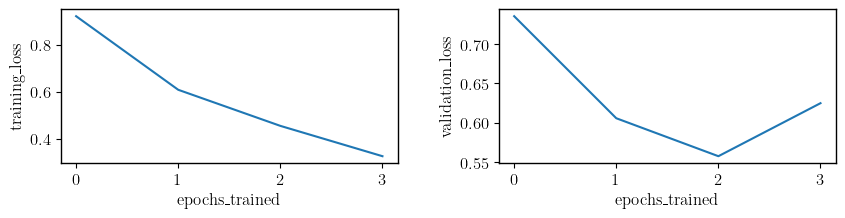

In [4]:
model.stop_after_epochs = 1
model.train(data[:,:,0], parameters) # pour l'instant une dimension de point (il faut faire encoder)
Ploter.plot_loss(model.neural_network)

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

True parameter tensor([4.2975])
Observed data tensor([ 0.0314,  0.0497, -0.0988,  0.0350]) tensor([1.0248, 1.0024, 0.9360, 0.9300])


Generating 20 MCMC inits via resample strategy:   0%|          | 0/20 [00:00<?, ?it/s]

Running vectorized MCMC with 20 chains:   0%|          | 0/6000 [00:00<?, ?it/s]

Predicted parameter mean tensor(4.0797)


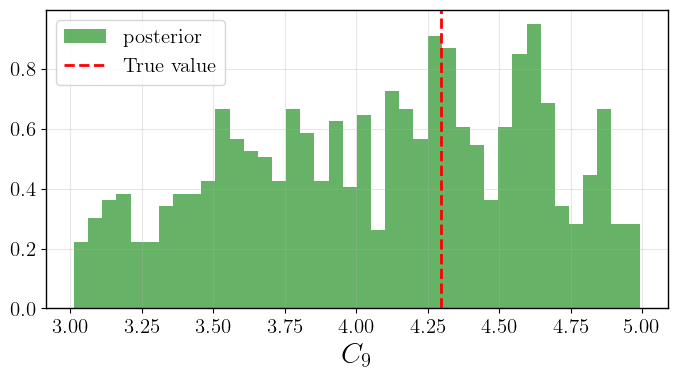

In [5]:
true_parameter, observed_sample = model.get_random_true_parameter(n_points)
print("True parameter", true_parameter)
print("Observed data", observed_sample.mean(dim=(0)), observed_sample.std(dim=0))
n_sampled_parameters = 1000
sampled_parameters = model.draw_parameters_from_predicted_posterior(observed_sample[:,0], n_sampled_parameters)
print("Predicted parameter mean", sampled_parameters.mean())
Ploter.plot_a_posterior(model, sampled_parameters, true_parameter)

In [9]:
n_similar = 5
Ploter.plot_similar_data(model, observed_sample[:,0], n_similar, n_points)

Generating 20 MCMC inits via resample strategy:   0%|          | 0/20 [00:00<?, ?it/s]

Running vectorized MCMC with 20 chains:   0%|          | 0/5020 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/5 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/1 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

similar shape torch.Size([5, 1000, 4])
observed shape torch.Size([1000])


IndexError: too many indices for tensor of dimension 1